In [1]:
from multiprocessing import Pool, cpu_count
total_cores = cpu_count()
print('total cores: ', total_cores)

total cores:  8


In [2]:
import numpy as np
def special_squares(n):
    v = np.arange(n)
    return v[v%2==0]**2
n = 1000000
%timeit special_squares(n)

16.9 ms ± 122 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [3]:
import math
def loop1(n):
    """Using for loop with function call."""
    z = []
    for i in range(n):
        z.append(math.sin(i))
    return z

def loop2(n):
    """Using local version of function."""
    z = []
    sin = math.sin
    for i in range(n):
        z.append(sin(i))
    return z

def loop3(n):
    """Using list comprehension."""
    sin = math.sin
    return [sin(i) for i in range(n)]

def loop4(n):
    """Using map."""
    sin = math.sin
    return list(map(sin, range(n)))

def loop5(n):
    """Using numpy."""
    return np.sin(np.arange(n)).tolist()


In [4]:
import time
import pandas as pd
n = 10000

column_names = ['Loop1', 'Loop2', 'Loop3', 'Loop4', 'Loop5']

results = pd.DataFrame(columns = column_names)

for i in range(n):
    start = time.time()
    loop1(i)
    end = time.time()
    L1 = end - start

    start = time.time()
    loop2(i)
    end = time.time()
    L2 = end - start

    start = time.time()
    loop3(i)
    end = time.time()
    L3 = end - start

    start = time.time()
    loop4(i)
    end = time.time()
    L4 = end - start

    start = time.time()
    loop5(i)
    end = time.time()
    L5 = end - start

    results = results.append(pd.Series([L1, L2, L3, L4, L5], index=results.columns ), ignore_index=True)
    

results


,Loop1,Loop2,Loop3,Loop4,Loop5
0,0.000003,1.907349e-06,0.000002,1.907349e-06,0.000013
1,0.000004,7.152557e-07,0.000002,1.907349e-06,0.000008
2,0.000003,9.536743e-07,0.000002,1.907349e-06,0.000006
3,0.000003,2.145767e-06,0.000002,2.145767e-06,0.000006
4,0.000004,9.536743e-07,0.000002,9.536743e-07,0.000007
...,...,...,...,...,...
9995,0.001803,1.389980e-03,0.001022,8.578300e-04,0.000311
9996,0.001795,1.399755e-03,0.001044,8.492470e-04,0.000311
9997,0.001796,1.389027e-03,0.001019,8.251667e-04,0.000310
9998,0.001878,1.464128e-03,0.001021,8.251667e-04,0.000311


In [5]:
import matplotlib.pyplot as plt
plt.close('all')

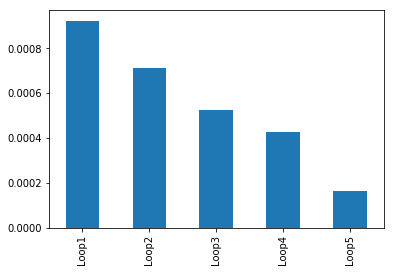

In [13]:
plt.figure();
results.mean().plot(kind='bar');

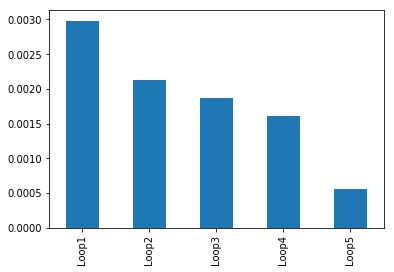

In [14]:
plt.figure();
results.max().plot(kind='bar');

In [ ]:
plt.figure();
results.min().plot(kind='bar');

<Figure size 432x288 with 0 Axes>

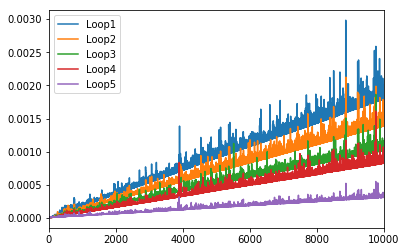

In [9]:
plt.figure();
results.plot(kind='line');

In [12]:
print("Loop 1:")
%timeit loop4(n)

print("Loop 2:")
%timeit loop4(n)

print("Loop 3:")
%timeit loop4(n)

print("Loop 4:")
%timeit loop4(n)

print("Loop 5:")
%timeit loop5(n)

Loop 1:
884 µs ± 14 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Loop 2:
883 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Loop 3:
880 µs ± 14.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Loop 4:
879 µs ± 14.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
Loop 5:
323 µs ± 10.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
